In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


In [8]:
df = pd.read_csv("canada_per_capita_income.csv")
df.head(), df.tail()

(   year  per capita income (US$)
 0  1970              3399.299037
 1  1971              3768.297935
 2  1972              4251.175484
 3  1973              4804.463248
 4  1974              5576.514583,
     year  per capita income (US$)
 42  2012              42665.25597
 43  2013              42676.46837
 44  2014              41039.89360
 45  2015              35175.18898
 46  2016              34229.19363)

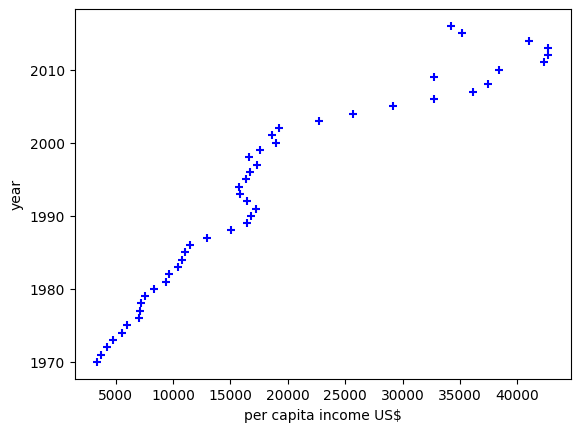

In [9]:
%matplotlib inline
plt.xlabel("per capita income US$")
plt.ylabel("year")
plt.scatter(df["per capita income (US$)"],df.year , marker ="+", color ="blue")

In [10]:
new_df = df.drop("per capita income (US$)", axis='columns')
new_df.head()



        

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [11]:
per_capita_income = df["per capita income (US$)"]
per_capita_income.head()
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

We want to train a linear regression model to predict the per capita income based on the year.
We pass the feature data (year) as input (X) and the target data (per capita income) as labels (y).
The model automatically learns the best-fitting line by determining the slope (m) and intercept (c) using the least squares method.
This allows us to represent the relationship as a straight line:

𝑦=𝑚𝑥+𝑐

Once trained, the model can predict the per capita income for any given year by mapping new inputs to the learned line.

In [33]:
reg = linear_model.LinearRegression()
reg.fit(new_df, per_capita_income)

LinearRegression()

In [42]:
reg.predict(pd.DataFrame([2020], columns=["year"]))

array([41288.69409442])

In [24]:
import pickle

In [25]:
with open("model.pkl", "wb") as f:
    mod = pickle.dump(reg, f)

    

In [26]:
with open("model.pkl", "rb") as f:
    new_mod = pickle.load(f)

In [27]:
new_mod.intercept_
new_mod.coef_

array([828.46507522])

In [28]:
import joblib

In [29]:
joblib.dump(reg, "model_joblib")

['model_joblib']

In [30]:
new = joblib.load("model_joblib")

In [31]:
new.coef_

array([828.46507522])